## 4.2 손실함수
### 4.2.1 평균 제곱 오차

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.0975
0.5975


### 4.2.2 교차 엔트로피 오차

In [4]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [5]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099
2.30258409299


In [6]:
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


### 4.2.3 미니배치 학습

In [7]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

정답 레이블이 원-핫 인코딩일 때

In [8]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

정답 레이블이 원-핫 인코딩이 아니라 숫자 레이블로 주어졌을 때

In [9]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

## 4.3 수치 미분
### 4.3.1 미분

수치 미분

In [10]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001: h에 가급적 작은 값을 대입하되 반올림 오차 문제를 줄이는 값
    return (f(x+h) - f(x-h)) / (2*h) # 중심 차분 or 중앙 차분

### 4.3.2 수치 미분의 예

In [11]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

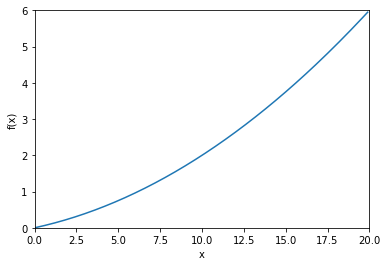

In [12]:
x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axis([0, 20, 0, 6])
plt.plot(x, y)
plt.show()

In [13]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


수치 미분 값을 기울기로 하는 직선 그리기 (ch04/gradient_1d.py)

In [14]:
def tangent_line(f, x):
    d = numerical_diff(f, x) # 함수 f의 수치 미분 값(=직선의 기울기)을 획득.
    print(d)
    y = f(x) - d*x # 직선의 y절편을 획득.
    return lambda t: d*t + y

0.1999999999990898
0.2999999999986347


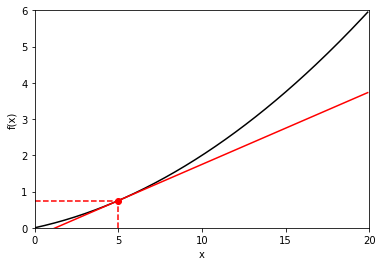

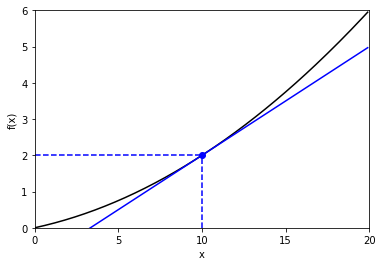

In [15]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

tf = tangent_line(function_1, 5) # x = 5에서의 접선.
tf2 = tangent_line(function_1, 10) # x = 10에서의 접선.
y2 = tf(x)
y3 = tf2(x)

# x = 5에서의 접선 그래프
plt.figure(1)
plt.plot(x, y, color='black')

plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(0, 20)
plt.ylim(0, 6)
plt.xticks(np.linspace(0,20,5))

plt.plot(x, y2, color='red')
plt.plot(5, function_1(5), 'ro')
plt.plot([5, 5],[0, function_1(5)], color ='red', linestyle="--")
plt.plot([0, 5],[function_1(5), function_1(5)], color ='red', linestyle="--")

# x = 10에서의 접선 그래프
plt.figure(2)
plt.plot(x, y, color='black')

plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(0, 20)
plt.ylim(0, 6)
plt.xticks(np.linspace(0,20,5))

plt.plot(x, y3, color='blue')
plt.plot(10, function_1(10), 'bo')
plt.plot([10, 10],[0, function_1(10)], color ='blue', linestyle="--")
plt.plot([0, 10],[function_1(10), function_1(10)], color ='blue', linestyle="--")

plt.show()

### 4.3.3 편미분

In [16]:
def function_2(x):
    return x[0]**2 + x[1]**2 # 또는 return np.sum(x**2)

$x_0 = 3$, $x_1 = 4$일 때, $x_0$에 대한 편미분 $\frac{\partial f}{\partial x_0}$를 구하라

In [17]:
# x1 = 4로 고정된 새로운 함수를 정의하고, 변수가 x0 하나뿐인 함수에 대해 수치 미분 함수를 적용.
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

print(numerical_diff(function_tmp1, 3.0))

6.00000000000378


$x_0 = 3$, $x_1 = 4$일 때, $x_1$에 대한 편미분 $\frac{\partial f}{\partial x_1}$를 구하라

In [18]:
# x0 = 3으로 고정된 새로운 함수를 정의하고, 변수가 x1 하나뿐인 함수에 대해 수치 미분 함수를 적용.
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp2, 4.0))

7.999999999999119


## 4.4 기울기

기울기(gradient): $(\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1})$처럼 모든 변수의 편미분을 벡터로 정리한 것

In [19]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    
    return grad

In [20]:
print(_numerical_gradient_no_batch(function_2, np.array([3.0, 4.0])))
print(_numerical_gradient_no_batch(function_2, np.array([0.0, 2.0])))
print(_numerical_gradient_no_batch(function_2, np.array([3.0, 0.0])))

[ 6.  8.]
[ 0.  4.]
[ 6.  0.]


기울기 결과에 마이너스를 붙인 벡터 그리기(ch04/gradient_2d.py)

$f(x_0,x_1)=x_0^2+x_1^2$의 기울기

In [21]:
from mpl_toolkits.mplot3d import Axes3D

In [22]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

    
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

/usr/local/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


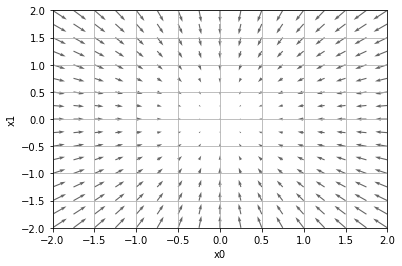

In [23]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

### 4.4.1 경사법(경사 하강법)

$x_0 = x_0 - \eta\frac{\partial f}{\partial x_0}$

$x_1 = x_1 - \eta\frac{\partial f}{\partial x_1}$

In [24]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

경사법으로 $f(x_0,x_1) = x_0^2+x_1^2$의 최솟값을 구하라.

In [25]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

경사법에 의한 $f(x_0,x_1) = x_0^2+x_1^2$의 갱신 과정.

In [26]:
def gradient_descent_history(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

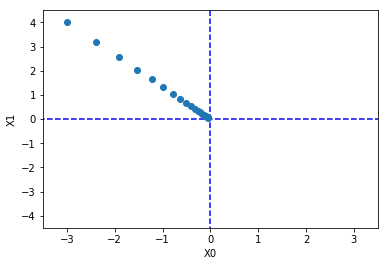

In [27]:
init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent_history(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [28]:
# 학습률이 너무 큰 예
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([ -2.58983747e+13,  -1.29524862e+12])

In [29]:
# 학습률이 너무 작은 예
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

### 4.4.2 신경망에서의 기울기

In [30]:
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [31]:
net = simpleNet()
print(net.W)

[[ 2.06378423  0.75774026 -0.80588848]
 [ 0.99845833  0.92434391  0.29048905]]


In [32]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 2.13688304  1.28655367 -0.22209294]


In [33]:
np.argmax(p)

0

In [34]:
t = np.array([0, 0, 1])
net.loss(x, t)

2.7788640032043652

In [35]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.39427224  0.16846235 -0.56273459]
 [ 0.59140836  0.25269352 -0.84410188]]


lambda 기법을 사용하는 경우

In [36]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.39427224  0.16846235 -0.56273459]
 [ 0.59140836  0.25269352 -0.84410188]]


## 4.5 학습 알고리즘 구현하기

In [37]:
from functions import *
from gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [38]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [39]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
y = net.predict(x)

In [40]:
t = np.random.rand(100, 10) # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t) # 기울기 계산

print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### 4.5.2 미니배치 학습 구현하기

In [ ]:
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선판(오차역전파법 이용)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

### 4.5.3 시험 데이터로 평가하기

1에폭별 훈련 데이터와 시험 데이터에 대한 정확도를 기록하게 수정.

In [ ]:
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선판(오차역전파법 이용)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + str(test_acc))